##Ví dụ 1

In [1]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

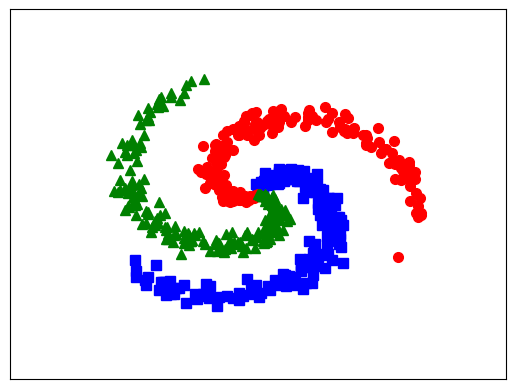

In [2]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

In [3]:
def softmax(V):
  e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
  Z = e_V / e_V.sum(axis = 0)
  return Z

In [4]:
# cost or loss function
def cost(Y, Yhat):
  return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [5]:
from scipy import sparse
def convert_labels(y, C = 3):
  Y = sparse.coo_matrix((np.ones_like(y),
  (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y

In [6]:
d0 = 2
d1 = h = 100
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

for i in range(10000):
## Feedforward
  Z1 = np.dot(W1.T, X) + b1
  A1 = np.maximum(Z1, 0)
  Z2 = np.dot(W2.T, A1) + b2
  Yhat = softmax(Z2)

  # print loss after each 1000 iterations
  if i %1000 == 0:
    # compute the loss: average cross-entropy loss
    loss = cost(Y, Yhat)
    print("iter %d, loss: %f" %(i, loss))

  # backpropagation
  E2 = (Yhat - Y )/N
  dW2 = np.dot(A1, E2.T)
  db2 = np.sum(E2, axis = 1, keepdims = True)
  E1 = np.dot(W2, E2)
  E1[Z1 <= 0] = 0 # gradient of ReLU
  dW1 = np.dot(X, E1.T)
  db1 = np.sum(E1, axis = 1, keepdims = True)

  # Gradient Descent update
  W1 += -eta*dW1
  b1 += -eta*db1
  W2 += -eta*dW2
  b2 += -eta*db2

Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

iter 0, loss: 1.098683
iter 1000, loss: 0.132900
iter 2000, loss: 0.050410
iter 3000, loss: 0.034732
iter 4000, loss: 0.027295
iter 5000, loss: 0.023202
iter 6000, loss: 0.020546
iter 7000, loss: 0.018680
iter 8000, loss: 0.017293
iter 9000, loss: 0.016234
training accuracy: 99.67 %


(1, 14400)
100


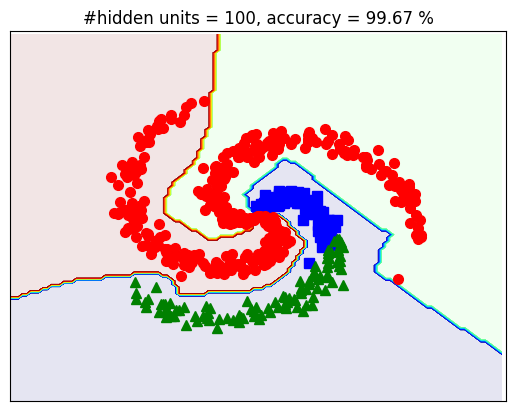

In [7]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class

Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 100
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

##Bài tập ứng dụng 1

In [8]:
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load dữ liệu
iris = load_iris()
X = iris.data
y = iris.target

# Chia mỗi lớp thành 40 train + 10 validation
train_idx, val_idx = [], []
for i in range(3):
    idx = np.where(y == i)[0]
    np.random.shuffle(idx)
    train_idx.extend(idx[:40])
    val_idx.extend(idx[40:50])

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

# Hàm đánh giá mô hình
def evaluate_model(name, model, X_train, y_train, X_val, y_val):
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_pred = time.time()
    y_pred = model.predict(X_val)
    pred_time = (time.time() - start_pred) / len(X_val)  # time per sample

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro')
    rec = recall_score(y_val, y_pred, average='macro')

    return {
        'model': name,
        'train_time': train_time,
        'pred_time': pred_time,
        'accuracy': acc,
        'precision': prec,
        'recall': rec
    }

# Khởi tạo mô hình ANN với 100 hidden units
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
nb = GaussianNB()

results = []
results.append(evaluate_model("ANN (100 units)", ann, X_train, y_train, X_val, y_val))
results.append(evaluate_model("Softmax Regression", softmax, X_train, y_train, X_val, y_val))
results.append(evaluate_model("Naive Bayes", nb, X_train, y_train, X_val, y_val))

# Thử nghiệm thay đổi số chiều hidden layer
ann_75 = MLPClassifier(hidden_layer_sizes=(75,), max_iter=1000, random_state=42)
ann_50 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
results.append(evaluate_model("ANN (75 units)", ann_75, X_train, y_train, X_val, y_val))
results.append(evaluate_model("ANN (50 units)", ann_50, X_train, y_train, X_val, y_val))

results


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[{'model': 'ANN (100 units)',
  'train_time': 0.4761538505554199,
  'pred_time': 2.350807189941406e-05,
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0},
 {'model': 'Softmax Regression',
  'train_time': 0.03329324722290039,
  'pred_time': 1.5060106913248697e-05,
  'accuracy': 0.9666666666666667,
  'precision': 0.9696969696969697,
  'recall': 0.9666666666666667},
 {'model': 'Naive Bayes',
  'train_time': 0.001531839370727539,
  'pred_time': 1.270771026611328e-05,
  'accuracy': 0.9333333333333333,
  'precision': 0.9333333333333332,
  'recall': 0.9333333333333332},
 {'model': 'ANN (75 units)',
  'train_time': 0.5209019184112549,
  'pred_time': 2.258618672688802e-05,
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0},
 {'model': 'ANN (50 units)',
  'train_time': 0.5911345481872559,
  'pred_time': 2.2109349568684896e-05,
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0}]

Bài tập tự thực hành

##Ví dụ 2

In [9]:
import os
import numpy as np
import struct
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import gzip
# set names to the paths because they're too long
data_path = '/content/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
  """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
  """
  # read data
  import gzip # to decompress gz (zip) file
  # open file training to read training data
  f_images = gzip.open(images_path,'r')
  # skip 16 first bytes because these are not data, only header infor
  f_images.read(16)
  # general: read num_images data samples if this parameter is set;
  # if not, read all (60000 training or 10000 test)
  real_num = num_images if not shuffle else (60000 if _is else 10000)
  # read all data to buf_images (28x28xreal_num)
  buf_images = f_images.read(image_size * image_size * real_num)
  # images
  images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
  images = images.reshape(real_num, image_size, image_size,)
  # Read labels
  f_labels = gzip.open(labels_path,'r')
  f_labels.read(8)
  labels = np.zeros((real_num)).astype(np.int64)
  # rearrange to correspond the images and labels
  for i in range(0, real_num):
    buf_labels = f_labels.read(1)
    labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
  if shuffle is True:
    rand_id = np.random.randint(real_num, size=num_images)
    images = images[rand_id, :]
    labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
  images = images.reshape(num_images, image_size * image_size)
  return images, labels


In [15]:
train_images, train_labels = get_mnist_data(
train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(
test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

<ipython-input-9-62a7b157adb7>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


In [16]:
# Lấy 5000 ảnh ngẫu nhiên từ tập train
subset_indices = np.random.choice(len(train_images), 5000, replace=False)
X = train_images[subset_indices]
y = train_labels[subset_indices]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA giảm chiều xuống 100
pca = PCA(n_components=125)
X_pca_all = pca.fit_transform(X_scaled)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

# Tách train-test từ dữ liệu sau PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca_all, y, test_size=0.3, random_state=42, stratify=y)

### (b) Logistic Regression - Multinomial ###
start_lr = time.time()
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
time_lr = time.time() - start_lr
acc_lr = accuracy_score(y_test, y_pred_lr)

print("==== Logistic Regression ====")
print(f"Độ chính xác: {acc_lr:.4f}")
print(f"Thời gian huấn luyện và dự đoán: {time_lr:.2f} giây")
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


==== Logistic Regression ====
Độ chính xác: 0.8953
Thời gian huấn luyện và dự đoán: 0.94 giây
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.91      0.98      0.94       165
           2       0.87      0.84      0.85       148
           3       0.85      0.87      0.86       140
           4       0.94      0.91      0.92       151
           5       0.88      0.88      0.88       143
           6       0.96      0.92      0.94       145
           7       0.91      0.94      0.93       157
           8       0.81      0.83      0.82       149
           9       0.90      0.83      0.86       154

    accuracy                           0.90      1500
   macro avg       0.90      0.89      0.89      1500
weighted avg       0.90      0.90      0.90      1500



In [18]:
#c.MLPClassifier (ANN mặc định với 100 hidden units)
start_ann = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)
mlp.fit(X_train, y_train)
y_pred_ann = mlp.predict(X_test)
time_ann = time.time() - start_ann
acc_ann = accuracy_score(y_test, y_pred_ann)

print("==== ANN (100 hidden units) ====")
print(f"Độ chính xác: {acc_ann:.4f}")
print(f"Thời gian huấn luyện và dự đoán: {time_ann:.2f} giây")
print(classification_report(y_test, y_pred_ann))


==== ANN (100 hidden units) ====
Độ chính xác: 0.9327
Thời gian huấn luyện và dự đoán: 4.35 giây
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       148
           1       0.98      0.98      0.98       165
           2       0.88      0.91      0.89       148
           3       0.91      0.91      0.91       140
           4       0.97      0.94      0.95       151
           5       0.92      0.91      0.91       143
           6       0.97      0.94      0.95       145
           7       0.94      0.93      0.93       157
           8       0.95      0.90      0.92       149
           9       0.89      0.92      0.90       154

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



In [19]:
start_ann_150 = time.time()
mlp_150 = MLPClassifier(hidden_layer_sizes=(150,), max_iter=300, solver='adam', random_state=42)
mlp_150.fit(X_train, y_train)
y_pred_ann_150 = mlp_150.predict(X_test)
time_ann_150 = time.time() - start_ann_150
acc_ann_150 = accuracy_score(y_test, y_pred_ann_150)

print("==== ANN (150 hidden units) ====")
print(f"Độ chính xác: {acc_ann_150:.4f}")
print(f"Thời gian huấn luyện và dự đoán: {time_ann_150:.2f} giây")
print(classification_report(y_test, y_pred_ann_150))


==== ANN (150 hidden units) ====
Độ chính xác: 0.9380
Thời gian huấn luyện và dự đoán: 6.28 giây
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       148
           1       0.96      0.99      0.98       165
           2       0.89      0.92      0.91       148
           3       0.93      0.92      0.93       140
           4       0.94      0.95      0.94       151
           5       0.92      0.94      0.93       143
           6       0.99      0.93      0.96       145
           7       0.93      0.94      0.94       157
           8       0.94      0.91      0.92       149
           9       0.91      0.90      0.91       154

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



## Ví dụ 3

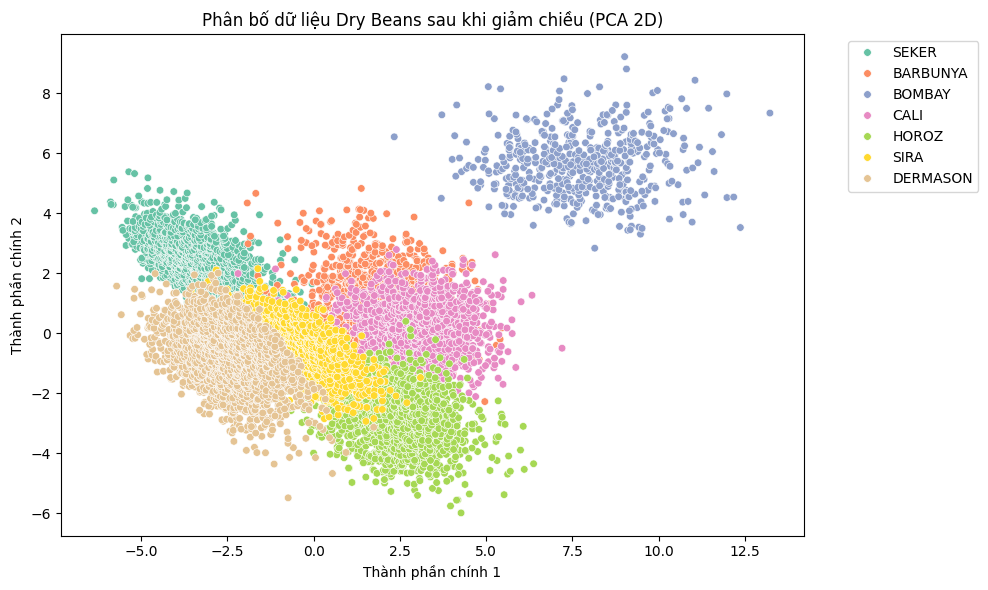

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Đọc dữ liệu
df = pd.read_csv("/content/Dry_Bean_Dataset.csv")

# Tách dữ liệu đặc trưng và nhãn
X = df.drop(columns=["Class"])
y = df["Class"]

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm chiều bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2", s=30)
plt.title("Phân bố dữ liệu Dry Beans sau khi giảm chiều (PCA 2D)")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [22]:
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(X_scaled)
# Chia dữ liệu train:test = 7:3
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_pca_4, y, test_size=0.3, random_state=42, stratify=y)

# 1. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_val)

# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

# 3. ANN
mlp = MLPClassifier(hidden_layer_sizes=(32,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_ann = mlp.predict(X_val)

# Với dữ liệu PCA 4 chiều
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train_pca)
y_pred_nb_pca = nb_pca.predict(X_val_pca)

log_reg_pca = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg_pca.fit(X_train_pca, y_train_pca)
y_pred_log_pca = log_reg_pca.predict(X_val_pca)

mlp_pca = MLPClassifier(hidden_layer_sizes=(32,), max_iter=500, random_state=42)
mlp_pca.fit(X_train_pca, y_train_pca)
y_pred_ann_pca = mlp_pca.predict(X_val_pca)

# Lưu kết quả
results = {
    "NaiveBayes": {
        "Accuracy": accuracy_score(y_val, y_pred_nb),
        "Precision": precision_score(y_val, y_pred_nb, average='macro'),
        "Recall": recall_score(y_val, y_pred_nb, average='macro')
    },
    "LogisticRegression": {
        "Accuracy": accuracy_score(y_val, y_pred_log),
        "Precision": precision_score(y_val, y_pred_log, average='macro'),
        "Recall": recall_score(y_val, y_pred_log, average='macro')
    },
    "ANN": {
        "Accuracy": accuracy_score(y_val, y_pred_ann),
        "Precision": precision_score(y_val, y_pred_ann, average='macro'),
        "Recall": recall_score(y_val, y_pred_ann, average='macro')
    },
    "NaiveBayes_PCA": {
        "Accuracy": accuracy_score(y_val_pca, y_pred_nb_pca),
        "Precision": precision_score(y_val_pca, y_pred_nb_pca, average='macro'),
        "Recall": recall_score(y_val_pca, y_pred_nb_pca, average='macro')
    },
    "LogisticRegression_PCA": {
        "Accuracy": accuracy_score(y_val_pca, y_pred_log_pca),
        "Precision": precision_score(y_val_pca, y_pred_log_pca, average='macro'),
        "Recall": recall_score(y_val_pca, y_pred_log_pca, average='macro')
    },
    "ANN_PCA": {
        "Accuracy": accuracy_score(y_val_pca, y_pred_ann_pca),
        "Precision": precision_score(y_val_pca, y_pred_ann_pca, average='macro'),
        "Recall": recall_score(y_val_pca, y_pred_ann_pca, average='macro')
    }
}

results

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'NaiveBayes': {'Accuracy': 0.8969147894221352,
  'Precision': 0.9094143896757861,
  'Recall': 0.9083258441581076},
 'LogisticRegression': {'Accuracy': 0.921645445641528,
  'Precision': 0.9356303604753027,
  'Recall': 0.9336506298928292},
 'ANN': {'Accuracy': 0.9275220372184133,
  'Precision': 0.9415216695101716,
  'Recall': 0.9378833148029573},
 'NaiveBayes_PCA': {'Accuracy': 0.8648383937316356,
  'Precision': 0.8769514574263517,
  'Recall': 0.8696597465512124},
 'LogisticRegression_PCA': {'Accuracy': 0.8895690499510284,
  'Precision': 0.8960080521810286,
  'Recall': 0.8910405441455307},
 'ANN_PCA': {'Accuracy': 0.8974045053868757,
  'Precision': 0.9060585217562765,
  'Recall': 0.89938791132603}}

Phần 2

##Bài tập 1

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time

# Load data again
data = pd.read_csv("/content/SAT_GPA.csv")

# Extract features and target
X = data.iloc[:, 0].values.reshape(-1, 1)  # SAT scores
y = data.iloc[:, 1].values.reshape(-1, 1)  # GPA

# Normalize features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=30/84, random_state=42)

# Function to build and evaluate ANN
def build_and_train_ann(hidden_units):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

    start_train = time.time()
    model.fit(X_train, y_train, epochs=200, verbose=0)
    end_train = time.time()
    train_time = end_train - start_train

    start_pred = time.time()
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    pred_time = (time.time() - start_pred) / (len(X_train) + len(X_val))

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    return {
        'train_r2': train_r2, 'val_r2': val_r2,
        'train_mse': train_mse, 'val_mse': val_mse,
        'train_time': train_time, 'pred_time': pred_time
    }

# Linear regression
lr = LinearRegression()
start_lr_train = time.time()
lr.fit(X_train, y_train)
end_lr_train = time.time()
lr_train_time = end_lr_train - start_lr_train

start_lr_pred = time.time()
y_train_lr_pred = lr.predict(X_train)
y_val_lr_pred = lr.predict(X_val)
lr_pred_time = (time.time() - start_lr_pred) / (len(X_train) + len(X_val))

lr_results = {
    'train_r2': r2_score(y_train, y_train_lr_pred),
    'val_r2': r2_score(y_val, y_val_lr_pred),
    'train_mse': mean_squared_error(y_train, y_train_lr_pred),
    'val_mse': mean_squared_error(y_val, y_val_lr_pred),
    'train_time': lr_train_time,
    'pred_time': lr_pred_time
}

# Evaluate ANN models with hidden layer sizes 75 and 50
ann_results_75 = build_and_train_ann(75)
ann_results_50 = build_and_train_ann(50)

lr_results, ann_results_75, ann_results_50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


({'train_r2': 0.39271734855534446,
  'val_r2': 0.38009593248592033,
  'train_mse': 0.04338532640871794,
  'val_mse': 0.04547678229690041,
  'train_time': 0.010962963104248047,
  'pred_time': 8.140291486467635e-06},
 {'train_r2': 0.4525744181681792,
  'val_r2': 0.4246799115431973,
  'train_mse': 0.039109033488371185,
  'val_mse': 0.042206057009279506,
  'train_time': 13.039716005325317,
  'pred_time': 0.00324655430657523},
 {'train_r2': 0.45110446957974804,
  'val_r2': 0.4076167293780938,
  'train_mse': 0.03921404916626254,
  'val_mse': 0.043457829116093666,
  'train_time': 12.399792671203613,
  'pred_time': 0.004331673894609723})

##Ví dụ 4

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files
import zipfile



#Đọc dữ liệu ảnh
path = '/content/yalefaces_data'
ids = range(1, 16)
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'

# Đọc ảnh đầu tiên để lấy kích thước
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(os.path.join(path, fn), 0)
h, w = im.shape
D = h * w
N = len(states) * len(ids)

X = np.zeros((N, D))
y = []

count = 0
for person_id in ids:
    for state in states:
        fn = os.path.join(path, prefix + str(person_id).zfill(2) + '.' + state + surfix)
        img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        X[count, :] = img.flatten()
        y.append(person_id - 1)  # gán nhãn từ 0-14
        count += 1

y = np.array(y)

print("Dữ liệu X shape:", X.shape)
print("Nhãn y shape:", y.shape)

# B3: PCA giảm xuống còn 125 chiều
pca = PCA(n_components=125)
X_pca = pca.fit_transform(X)

# B4: Tách tập train-test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# B5: Logistic Regression
clf_lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
print("==> Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# B6: Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
print("==> Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# B7: ANN
model = Sequential()
model.add(Dense(128, input_dim=125, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation='softmax'))  # 15 classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("==> ANN Accuracy:", acc)

# B8: Dự đoán 5 ảnh chân dung có sẵn trong bộ dữ liệu
print("\n==> Dự đoán 5 ảnh chân dung có sẵn trong dữ liệu <==")

test_files = [
    'subject01.centerlight.png',
    'subject02.glasses.png',
    'subject03.happy.png',
    'subject04.normal.png',
    'subject05.sleepy.png'
]

for fn in test_files:
    img_path = os.path.join(path, fn)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (w, h))  # Đảm bảo đúng kích thước
    img_vec = img.flatten().reshape(1, -1)
    img_pca = pca.transform(img_vec)

    # Dự đoán với các mô hình
    pred_lr = clf_lr.predict(img_pca)[0]
    pred_nb = clf_nb.predict(img_pca)[0]
    pred_ann = np.argmax(model.predict(img_pca), axis=1)[0]

    print(f"\nẢnh {fn} được dự đoán là:")
    print(f" - Logistic Regression: subject {pred_lr+1:02d}")
    print(f" - Naive Bayes: subject {pred_nb+1:02d}")
    print(f" - ANN: subject {pred_ann+1:02d}")



Dữ liệu X shape: (165, 77760)
Nhãn y shape: (165,)
==> Logistic Regression Accuracy: 0.98
==> Naive Bayes Accuracy: 0.66
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0157 - loss: 2419.0420    
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3050 - loss: 707.4639 
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7135 - loss: 145.5957
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8132 - loss: 46.3200 
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9496 - loss: 9.4160  
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.7086     
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 5.1343     
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 

==> ANN Accuracy: 0.6000000238418579

==> Dự đoán 5 ảnh chân dung có sẵn trong dữ liệu <==
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

Ảnh subject01.centerlight.png được dự đoán là:
 - Logistic Regression: subject 01
 - Naive Bayes: subject 01
 - ANN: subject 01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Ảnh subject02.glasses.png được dự đoán là:
 - Logistic Regression: subject 02
 - Naive Bayes: subject 02
 - ANN: subject 02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Ảnh subject03.happy.png được dự đoán là:
 - Logistic Regression: subject 03
 - Naive Bayes: subject 03
 - ANN: subject 03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Ảnh subject04.normal.png được dự đoán là:
 - Logistic Regression: subject 04
 - Naive Bayes: subject 04
 - ANN: subject 04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Ảnh subject05.sleepy.png được dự đoán là:
 - Logistic Regression: subject 05
 - Naive Bayes: subject 05
 - ANN: subject 05


##Bài tập 2

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file txt
df = pd.read_csv("/content/vidu4_lin_reg.txt", sep="\s+")

# Xác định đầu vào (X) và đầu ra (y)
X = df[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
y = df['BEDAYNTM'].values

# Chia dữ liệu: 80 dòng đầu train, 20 dòng cuối test
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Mô hình ANN với 1 hidden layer 100 neurons
ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann.fit(X_train_scaled, y_train)

# Dự đoán
y_train_pred = ann.predict(X_train_scaled)
y_test_pred = ann.predict(X_test_scaled)

# Đánh giá
print("ANN - Training:")
print("R2 score:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))

print("ANN - Testing:")
print("R2 score:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))


ANN - Training:
R2 score: 0.2879344668634274
MSE: 0.09184478257548881
ANN - Testing:
R2 score: 0.28136057407200976
MSE: 0.20805527645883376


In [26]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_lr = lr.predict(X_train_scaled)
y_test_lr = lr.predict(X_test_scaled)

print("Linear Regression - Training:")
print("R2 score:", r2_score(y_train, y_train_lr))
print("MSE:", mean_squared_error(y_train, y_train_lr))

print("Linear Regression - Testing:")
print("R2 score:", r2_score(y_test, y_test_lr))
print("MSE:", mean_squared_error(y_test, y_test_lr))


Linear Regression - Training:
R2 score: 0.1768016018472709
MSE: 0.10617910062545732
Linear Regression - Testing:
R2 score: 0.21453893938640356
MSE: 0.22740099167615901


##Bài tập 3

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('/content/real_estate.csv')
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
X = df.iloc[:, 1:7].values  # Cột X1 đến X6
y = df.iloc[:, -1].values   # Cột Y

# Tách train/val
X_train, X_val = X[:350], X[350:]
y_train, y_val = y[:350], y[350:]

# Mô hình hồi quy tuyến tính
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)

# Mô hình ANN
ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_val)
mse_ann = mean_squared_error(y_val, y_pred_ann)

print(f"MSE Hồi quy tuyến tính: {mse_lr:.4f}")
print(f"MSE ANN: {mse_ann:.4f}")


MSE Hồi quy tuyến tính: 63.8070
MSE ANN: 52.7575
